In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
climate_base = automap_base()
# reflect the tables
climate_base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
climate_base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
meas = climate_base.classes.measurement
stat = climate_base.classes.station

In [8]:
# Create our session (link) from Python to the DB
climate_session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
climate_session.query(meas.date).order_by(meas.date.desc()).first()

('2017-08-23')

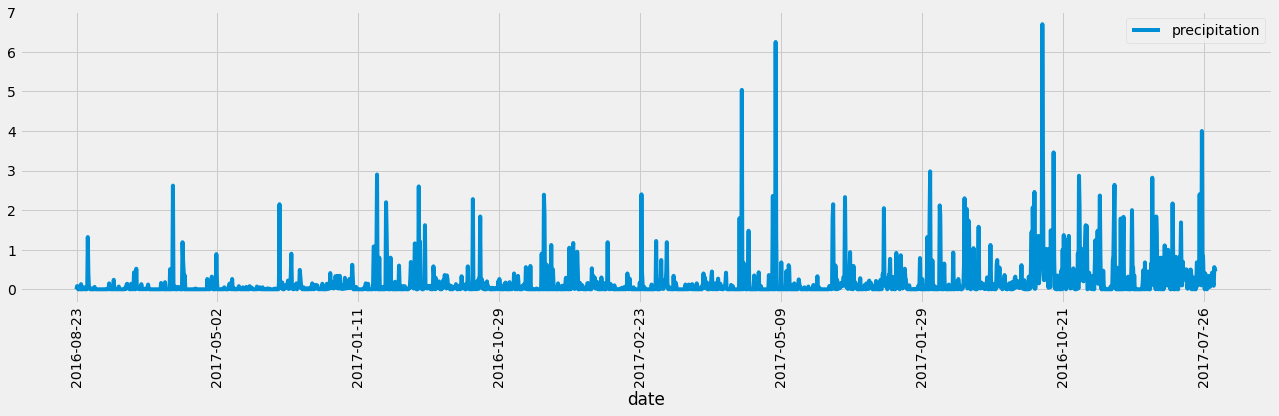

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = climate_session.query(meas.date,meas.prcp).filter(meas.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measdf = pd.DataFrame(results, columns=['date','precipitation'])
measdf.set_index('date',inplace=True)

# Sort the dataframe by date
measdf.sort_values('date')
measdf = measdf.dropna(how='any')

# Use Pandas Plotting with Matplotlib to plot the data
measdfline = measdf.plot(kind="line",figsize=(20,5))
plt.xticks(rotation=90)
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
measdf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
climate_session.query(stat.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
statcount = climate_session.query(meas.station,func.count(meas.station)).group_by(meas.station).order_by(func.count(meas.station).desc()).all()
statcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
statstats = climate_session.query(meas.station,func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)).filter(meas.station == 'USC00519281').all()
statstats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

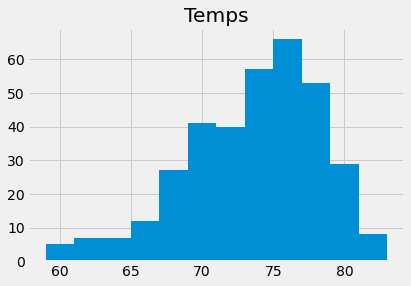

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = climate_session.query(meas.tobs).filter(meas.date >= '2016-08-23').filter(meas.station == 'USC00519281').all()
results = list(np.ravel(results))
tobsdf = pd.DataFrame({'Temps':results})
hist = tobsdf.hist(bins=12)

# Close session

In [16]:
# Close Session
climate_session.close()